Bu kod, MNIST veri seti üzerinde bir yapay sinir ağı (ANN) modelini eğitmek ve test etmek için yazılmış. İlk olarak, mnist.load_data() fonksiyonu ile veri seti yükleniyor ve eğitim (X_train, Y_train) ve test (X_test, Y_test) verileri ayrılıyor. Görsellerin her biri 28x28 piksellik gri tonlamalı resimler olduğundan, bu resimler normalize edilerek (0-1 arasında) model için uygun hale getiriliyor. Modelin yapısı, iki adet 50 nöronlu gizli katman ve bir çıkış katmanından oluşuyor. Çıkış katmanı, 10 sınıfa ait olasılıkları hesaplayan bir softmax fonksiyonu kullanarak sınıflandırma yapıyor. Model, sparse_categorical_crossentropy kayıp fonksiyonu ve adam optimizasyon algoritması ile derleniyor. Model, eğitim verisiyle 10 epoch boyunca eğitildikten sonra, test verisi üzerinde doğruluk (accuracy) oranı hesaplanıyor. Son olarak, modelin yaptığı tahminlerin doğruluğunu görselleştirmek için bir karmaşıklık matrisi (confusion matrix) oluşturuluyor ve ısı haritası ile görselleştiriliyor.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


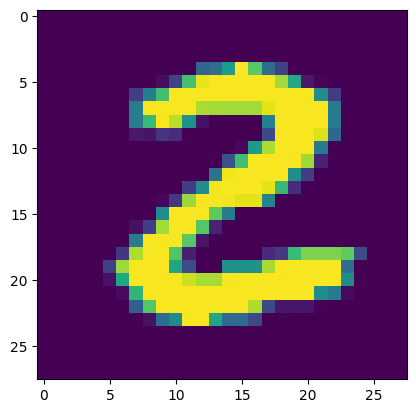

2


In [8]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [12]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8467 - loss: 0.5224
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9556 - loss: 0.1517
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.9670 - loss: 0.1094
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.9740 - loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.9796 - loss: 0.0678
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.9837 - loss: 0.0548
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.9866 - loss: 0.0451
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.9882 - loss: 0.0380
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.9892 - loss: 0.0344
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9905 - loss: 0.0299


In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.9643 - loss: 0.1377
0.9682000279426575


In [17]:
print(X_test.shape)

(10000, 28, 28)


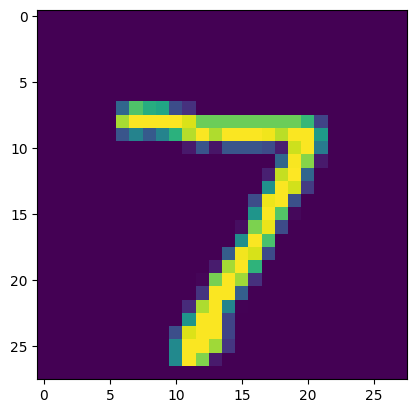

In [18]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[4.4219140e-03 3.2916961e-03 6.8084761e-03 9.7047901e-01 1.3804174e-07
 3.3230498e-03 2.1850598e-11 9.9999344e-01 6.5115420e-03 7.7815521e-01]


In [23]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 9, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 922    1    2    0    8    2    7    2    4   32]
 [   0 1120    1    2    0    2    3    1    6    0]
 [   4    2  988    4    5    2    6    7   13    1]
 [   0    0    1  980    0    8    0    5   10    6]
 [   0    0    1    0  970    0    5    0    1    5]
 [   1    0    0   12    5  858    3    1    9    3]
 [   2    3    1    1    9    6  933    0    3    0]
 [   0    2    6    2    3    0    0  995    4   16]
 [   1    0    2    4    4    3    3    2  951    4]
 [   0    2    0    1   27    3    2    3    6  965]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

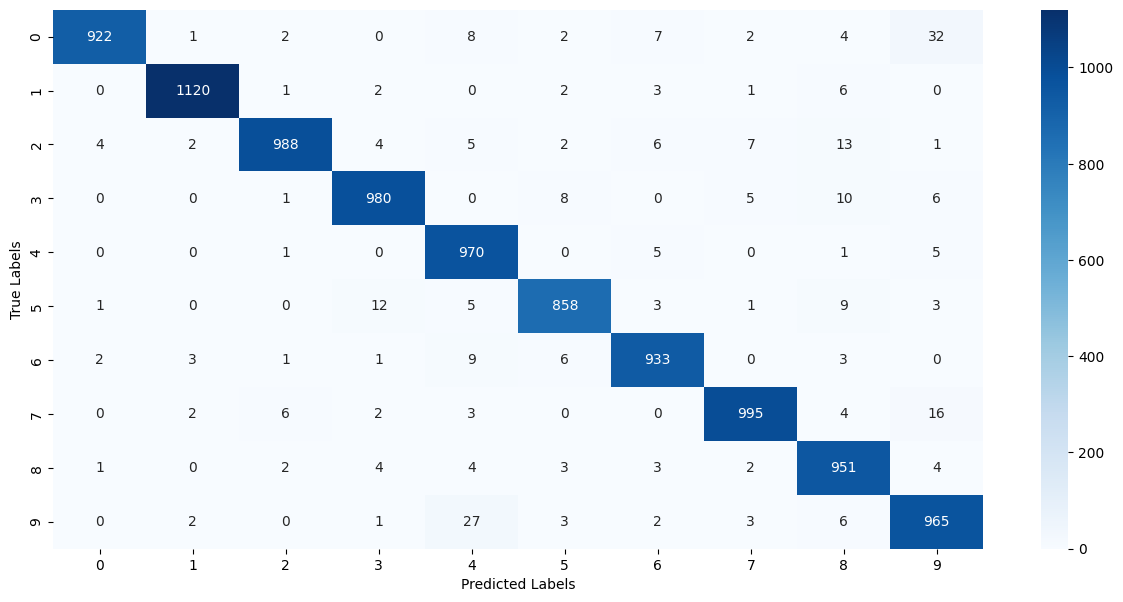

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')